In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [6]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
 331       1  45.5      0      0   28.5000           0         1           0   
 733       2  23.0      0      0   13.0000           0         1           0   
 382       3  32.0      0      0    7.9250           0         1           0   
 704       3  26.0      1      0    7.8542           0         1           0   
 813       3   6.0      4      2   31.2750           1         0           0   
 ..      ...   ...    ...    ...       ...         ...       ...         ...   
 106       3  21.0      0      0    7.6500           1         0           0   
 270       1  28.0      0      0   31.0000           0         1           0   
 860       3  41.0      2      0   14.1083           0         1           0   
 435       1  14.0      1      2  120.0000           1         0           0   
 102       1  21.0      0      1   77.2875           0         1           0   
 
      Embarked_Q  Embarked_S  
 331   

In [8]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [9]:
log_reg = LogisticRegression(max_iter=10000)
log_reg

LogisticRegression(max_iter=10000)

In [10]:
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [12]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Parameters: {'C': 0.1}
Best Accuracy Score: 0.7920811582783414


In [13]:
l1_score = []
l2_score = []

In [14]:
for c in param_grid['C']:
    l1_model = LogisticRegression(max_iter=10000, C=c, penalty='l1', solver='liblinear')
    l1_model.fit(X_train, y_train)
    l1_score.append(accuracy_score(y_test, l1_model.predict(X_test)))
    
    
    
    l2_model = LogisticRegression(max_iter=10000, C=c, penalty='l2')
    l2_model.fit(X_train, y_train)
    l2_score.append(accuracy_score(y_test, l2_model.predict(X_test)))

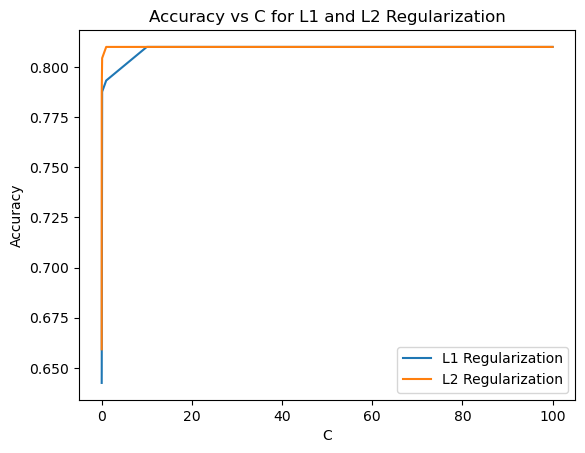

In [15]:
plt.plot(param_grid['C'], l1_score, label='L1 Regularization')
plt.plot(param_grid['C'], l2_score, label='L2 Regularization')


plt.xlabel('C')
plt.ylabel('Accuracy')

plt.title('Accuracy vs C for L1 and L2 Regularization')
plt.legend()
plt.show()

In [16]:
cv_scores = {}

for cv_val in range(2, 11):
    grid_search = GridSearchCV(log_reg, param_grid, cv=cv_val, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    cv_scores[cv_val] = grid_search.best_score_

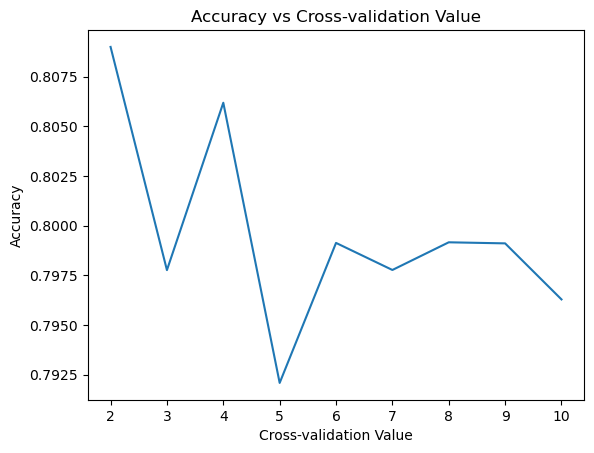

In [17]:
plt.plot(list(cv_scores.keys()), list(cv_scores.values()))

plt.xlabel('Cross-validation Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Cross-validation Value')
plt.show()

In [18]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

